# Data Scientist Professional Case Study
Company Background

Nearly New Nautical is a website that allows users to advertise their used boats for sale. When users list their boat, they have to provide a range of information about their boat. Boats that get lots of views bring more traffic to the website, and more potential customers.

To boost traffic to the website, the product manager wants to prevent listing boats that do not receive many views.

Customer Question

The product manager wants to know the following:

Can you predict the number of views a listing will receive based on the boat's features?
Success Criteria

The product manager would consider using your model if, on average, the predictions were only 50% off of the true number of views a listing would receive.

Dataset

The data you will use for this analysis can be accessed here: "data/boat_data.csv"
Column Name	Criteria
Price	Character, boat price listed in different currencies (e.g. EUR, Â£, CHF etc.) on the website.
Boat Type	Character, type of the boat
Manufacturer	Character, the name of the electric moped.
Type	Character, condition of the boat and engine type(e.g. Diesel, Unleaded, etc.).
Year Built	Numeric, year of the boat built.
Length	Numeric, length in meter of the boat.
Width	Numeric, width in meter of the boat.
Material	Character, material of the boat (e.g. GRP, PVC, etc.).
Location	Character, location of the boat is listed.
Number of views last 7 days	Numeric, number of the views of the list last 7 days.

In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
plt.rcParams["figure.figsize"] = (15,8)

In [16]:
# Read file into dataframe
df = pd.read_csv("/Users/adewaleolabintan/Downloads/boat_data.csv")

In [17]:
# Inspect dataframe by printing out the first few rows
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [18]:
# General overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [19]:
# Check the number of rows and columns in the dataframe
df.shape

(9888, 10)

In [20]:
# Check for unique values
df.nunique()

Price                          3182
Boat Type                       126
Manufacturer                    910
Type                             24
Year Built                      122
Length                         1612
Width                           575
Material                         11
Location                       2995
Number of views last 7 days     674
dtype: int64

In [21]:
# Check for duplicates
df.duplicated().sum()

0

In [22]:
# Print out columns containing nulls and number of nulls
df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

In [23]:
# Fill missing values with '0'
df.fillna({'Manufacturer':'Unknown', 'Material': 'Unknown', 'Type': 'Unknown','Location': 'Unknown', }, inplace=True)
df.isnull().sum()

Price                           0
Boat Type                       0
Manufacturer                    0
Type                            0
Year Built                      0
Length                          9
Width                          56
Material                        0
Location                        0
Number of views last 7 days     0
dtype: int64

In [24]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [25]:
# Fill missing values of lenght and width with mean
length_mean = df['Length'].mean()
width_mean = df['Width'].mean()
df.fillna({'Length': length_mean, 'Width': width_mean }, inplace=True)
df.isnull().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Location                       0
Number of views last 7 days    0
dtype: int64

In [26]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [27]:
df.shape

(9888, 10)

In [28]:
# Split the currency and amount
df['Currency'] = df.loc[:,'Price'].str.slice(0,3)
df["Price"] = df["Price"].str[3:].astype('int')
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,Denmark Â» Svendborg,64,DKK
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR


In [29]:
# Unique currency values
df['Currency'].unique()

array(['CHF', 'EUR', 'DKK', 'Â£ '], dtype=object)

In [30]:
# Standardize currency by converting all to $USD
dict = {'CHF' : 1.04, 'EUR' : 1, 'DKK': 0.13, 'Â£ ' : 1.14}
df.replace({'Currency': dict},inplace=True)
df['Price in USD'] = df['Currency'] * df['Price']

In [31]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Price in USD
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,1.04,3470.48
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,1.00,3490.00
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,1.04,3920.80
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,Denmark Â» Svendborg,64,0.13,3367.00
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,1.00,3399.00


In [32]:
# Drop Price column
df = df.drop(columns = ['Currency','Price'], axis = 1)

In [33]:
# Split location column into country, region and sub-region
df[['Country', 'Region', 'Sub Region']] = df['Location'].str.split('» ',expand=True)
df['Country'] = df['Country'].str.replace(' Â', '')
df['Region'] = df['Region'].str.replace(' Â', '')
df = df.drop(columns = ['Location', 'Region', 'Sub Region'])
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Price in USD,Country
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,226,3470.48,Switzerland
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.00,Germany
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,3920.80,Switzerland
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,64,3367.00,Denmark
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.00,Germany


DATA VALIDATION

Data Assessment
Checked the shape of the dataframe
Generated an overview of the dataframe
Checked the datatypes
Checked the number of unique values
Checked the data for null values
Checked for duplicate values.
Observation:
The dataset consists of 9888 rows and 10 columns.
There are 3194 missing values in the dataset.
Data Cleaning
There are different currencies in the Price column. I standardized the currency to USD by splitting the currency and numbers, then converting to USD then i dropped the Price column.
I also filled the missing values in the non-numerical column as unknown and filled the numerical columns with the mean of the values.
Exploratory Analysis

In [34]:
df.describe()

,Year Built,Length,Width,Number of views last 7 days,Price in USD
count,9888.000000,9888.000000,9888.000000,9888.000000,9.888000e+03
mean,1893.192860,11.570017,3.520124,149.160801,3.025077e+05
std,460.201582,6.000087,1.217073,151.819752,9.689443e+05
min,0.000000,1.040000,0.010000,13.000000,3.224000e+03
25%,1996.000000,7.470000,2.550000,70.000000,4.300000e+04
50%,2007.000000,10.300000,3.350000,108.000000,9.308000e+04
75%,2017.000000,13.920000,4.250000,172.000000,2.480000e+05
max,2021.000000,100.000000,25.160000,3263.000000,3.100000e+07


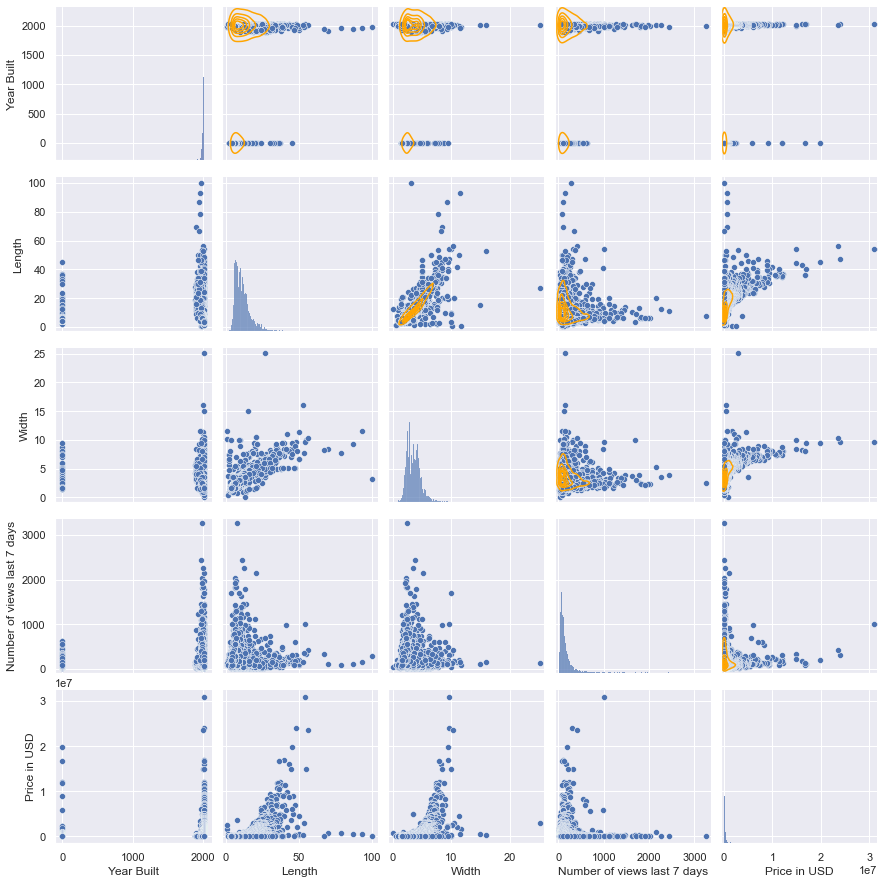

In [35]:
sns.set()
g = sns.pairplot(df)
g.map_upper(sns.kdeplot, n_levels=6, color='orange')
plt.show()

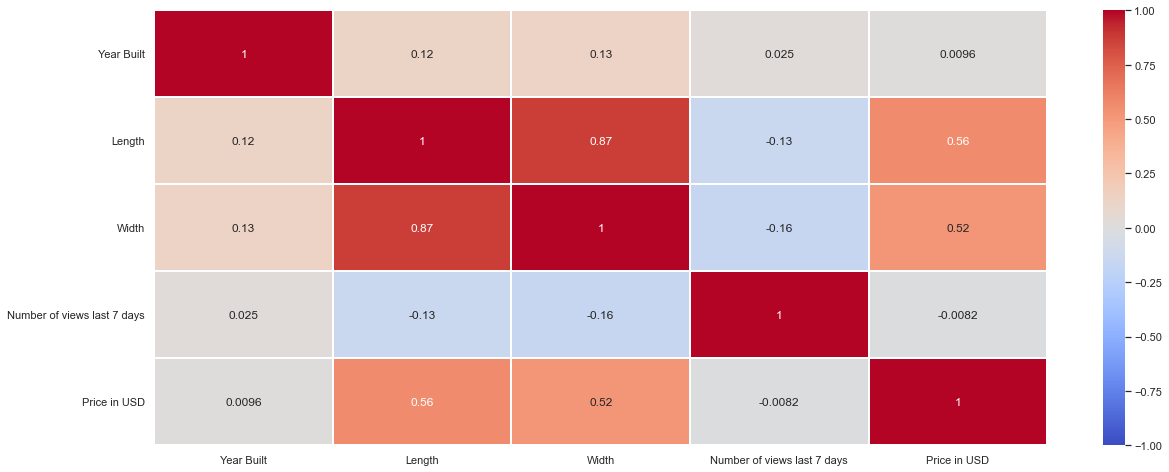

In [36]:
# Compute the correlation coefficient for all column pairs
plt.figure(figsize=(20,8))
corrMatrix = df.corr()

# Plot the correlation coefficient for all column pairs
sns.heatmap(corrMatrix, annot=True,linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

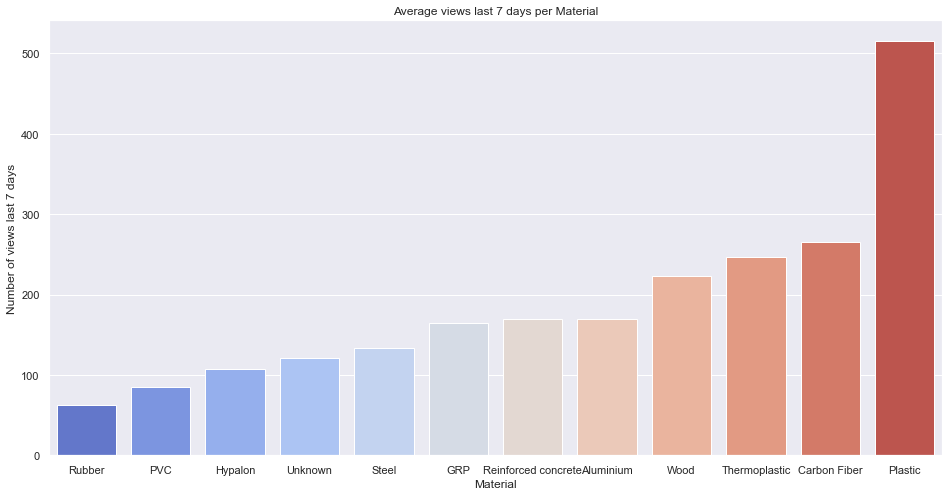

In [37]:
# Plotting average views last 7 days per Material
fig = plt.figure(figsize=(16,8))
Material_View= df.groupby('Material')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)


sns.barplot(x='Material', y='Number of views last 7 days', data=Material_View,
                 palette="coolwarm")
plt.title("Average views last 7 days per Material");

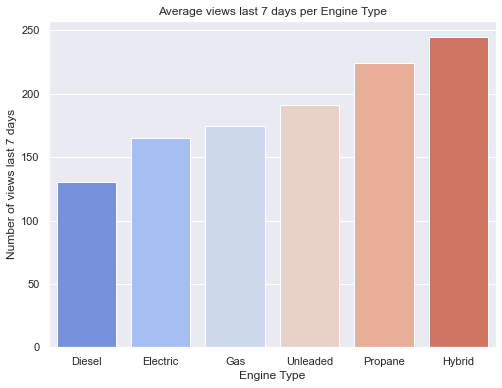

In [38]:
## Create Engine Type Column
df['Engine Type'] = df['Type'].str.split(pat = ',', expand = True)[1]

## Convert None to nan
df['Engine Type'] = df['Engine Type'].replace('None', np.nan)

fig = plt.figure(figsize=(8,6) )
Type_View= df.groupby('Engine Type')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Engine Type', y='Number of views last 7 days', data=Type_View,
                 palette="coolwarm")
plt.title("Average views last 7 days per Engine Type");

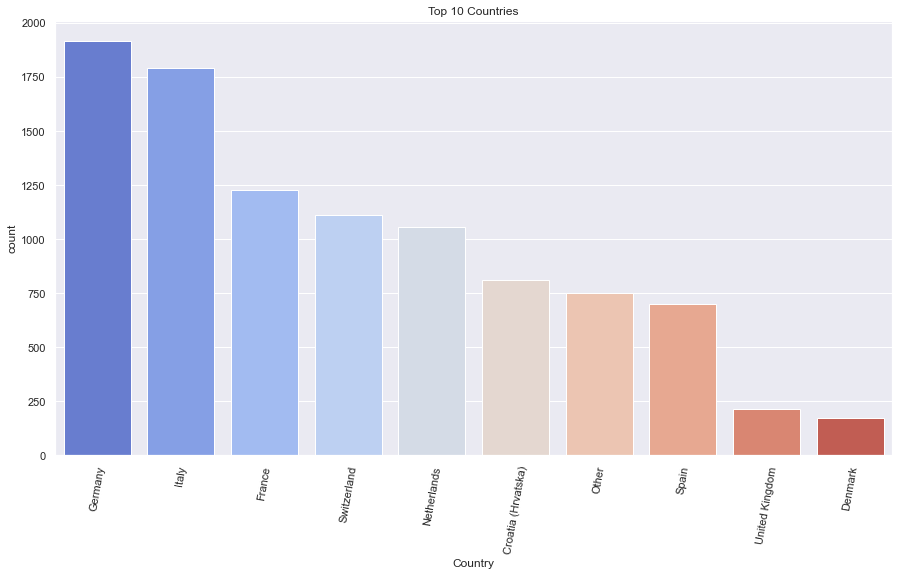

In [39]:
Top10_countries =  df['Country'].value_counts().iloc[:10].index

df.loc[~df['Country'].isin(Top10_countries),'Country']='Other'

ax = sns.countplot(x = 'Country', data = df, palette="coolwarm", order = df['Country'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
plt.title("Top 10 Countries");

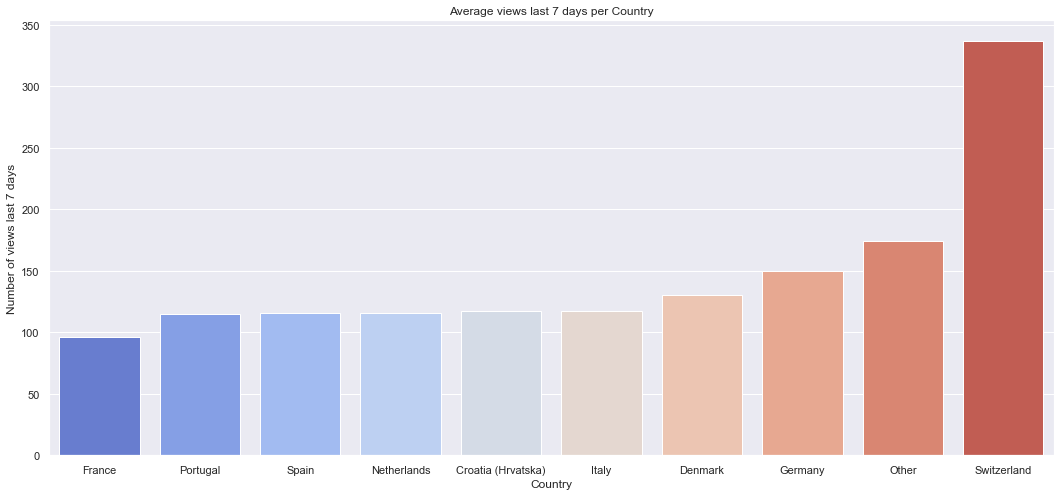

In [40]:
fig = plt.figure(figsize=(18,8) )
Country_View= df.groupby('Country')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Country', y='Number of views last 7 days', data=Country_View[-10:],
                 palette="coolwarm")
plt.title("Average views last 7 days per Country");

/Users/adewaleolabintan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


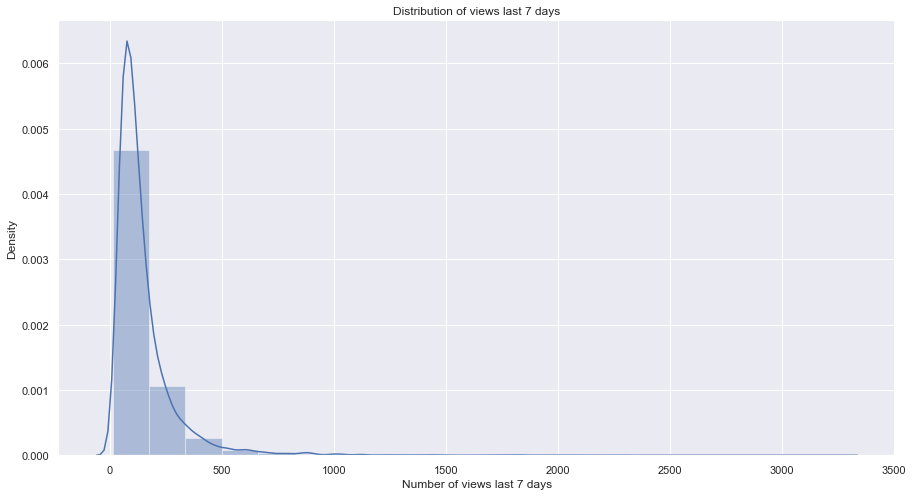

In [44]:
# Distribution of views 
sns.distplot(df['Number of views last 7 days'], bins=20)
plt.title('Distribution of views last 7 days');

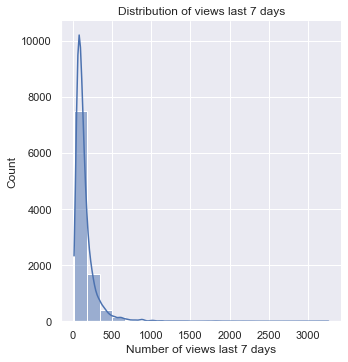

In [56]:
# Distribution of views 
sns.displot(data=df['Number of views last 7 days'], kde=True, bins=20)
plt.title('Distribution of views last 7 days');

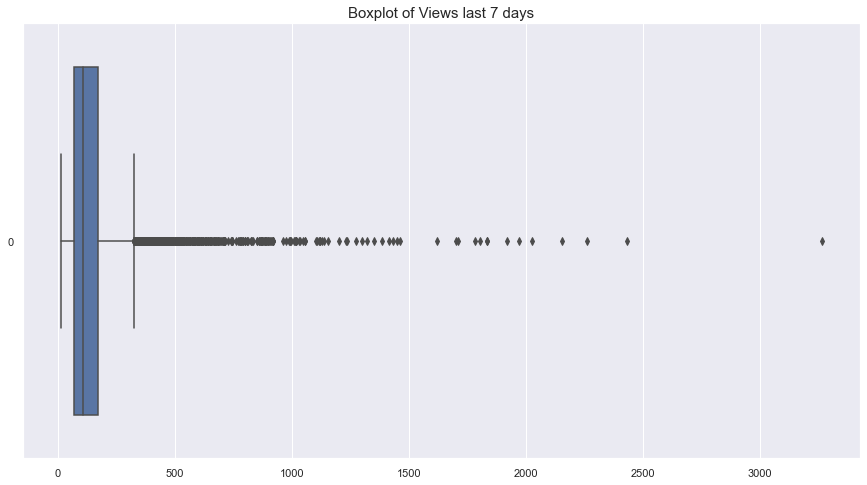

In [45]:
sns.boxplot(data=df['Number of views last 7 days'], orient='h')
plt.title('Boxplot of Views last 7 days', size=15);

In [57]:
df.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Number of views last 7 days', 'Price in USD', 'Country',
       'Engine Type'],
      dtype='object')

In [58]:
df.select_dtypes('object').nunique().sort_values()

Series([], dtype: float64)

In [59]:
freq_imp = SimpleImputer(strategy='most_frequent')
for col in ['Manufacturer', 'Type', 'Boat Type', 'Material']:
    df[[col]] = freq_imp.fit_transform(df[[col]])

In [60]:
# Label Encoding the categorical variables
columns = ['Boat Type', 'Engine Type', 'Country','Material','Manufacturer', 'Type']

le_list = {}

for column in columns:
    encoder = LabelEncoder()
    le_list[column] = encoder
    df[column] = encoder.fit_transform(df[column])

df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Price in USD,Country,Engine Type
0,96,655,16,2017,4.00,1.90,10,226,3470.48,9,6
1,38,797,16,2020,4.00,1.50,9,75,3490.00,3,6
2,116,490,16,0,3.69,1.42,0,124,3920.80,9,6
3,116,607,16,2020,3.00,1.00,10,64,3367.00,1,6
4,73,453,16,2019,3.55,1.46,0,58,3399.00,3,6


In [61]:
# Separate target and feature variables
X = df.drop('Number of views last 7 days', axis=1)
y = df['Number of views last 7 days']

In [62]:
# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

SUMMARY OF EXPLORATORY ANALYSIS

From the heatmap above, we can tell that the lenght and width of the boat are positively correlated.
The highest average views occur when the material is plastic.
The highest average views occur when Engine Type is hybrid.
Switzerland is the Country with the highest average views.
The distribution of views is skewed to the right.
I have encoded the categorical variables to numbers to prepare it for modelling as machine does not understand categorical data.
I created my target and feature variable, then I splitted it into subsets (train and test set).
Model Building

In [63]:
# Initialize baseline model, fit, predict and evaluate
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [64]:
# Evaluate baseline model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
#Mean Absolute Error: 84.74273877400053
#Mean Squared Error: 22415.198446603634
#Root Mean Squared Error: 149.7170613076667

Mean Absolute Error: 84.74273877400056
Mean Squared Error: 22415.19844660364
Root Mean Squared Error: 149.71706130766674


In [65]:
# Initialize comparison model, fit and predict
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [66]:
# Evaluate comparison model
print("Mean Absolute Error:", mean_absolute_error(y_test, rf_preds))
print("Mean Squared Error:", mean_squared_error(y_test, rf_preds))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, rf_preds)))
#Mean Absolute Error: 66.08860586691704
#Mean Squared Error: 16381.58903226059
#Root Mean Squared Error: 127.99058181077461

Mean Absolute Error: 66.27123414303368
Mean Squared Error: 16647.10266062521
Root Mean Squared Error: 129.02365155515173


# HYPERPARAMETER TUNING

In [67]:
# Define a parameter grid with distributions of possible parameters to use
rs_param_grid = {
    "n_estimators": list((range(20, 200))),
    "max_depth": list((range(3, 12))),
    "min_samples_split": list((range(2, 5))),
    "min_samples_leaf": list((range(1, 5))),
    "ccp_alpha": [0, 0.001, 0.01, 0.1],
}

In [68]:
# Instantiate RandomizedSearchCV() with rf and the parameter grid
rf_rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rs_param_grid,
    cv=3, 
    n_iter=10,   
    scoring="neg_mean_absolute_error",  # Metric to evaluate performance
    random_state=123
)

In [69]:
# Train the model on the training set
rf_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'ccp_alpha': [0, 0.001, 0.01, 0.1],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, 30, 31,
                                                         32, 33, 34, 35, 36, 37,
                                                         38, 39, 40, 41, 42, 43,
                                                         44, 45, 46, 47, 48, 49, ...]},
                   random_state=123, scoring='neg_mean_absolute_error')

In [70]:
# Print the best parameters and highest accuracy
print("Best parameters found: ", rf_rs.best_params_)
print("Best performance: ", -rf_rs.best_score_)

Best parameters found:  {'n_estimators': 85, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'ccp_alpha': 0}
Best performance:  63.48273853787032


In [71]:
print(f'Mean Absolute Percentage Error: {np.round(mean_absolute_percentage_error(y_test, rf_rs.predict(X_test))*100,0)}%')

Mean Absolute Percentage Error: 55.0%


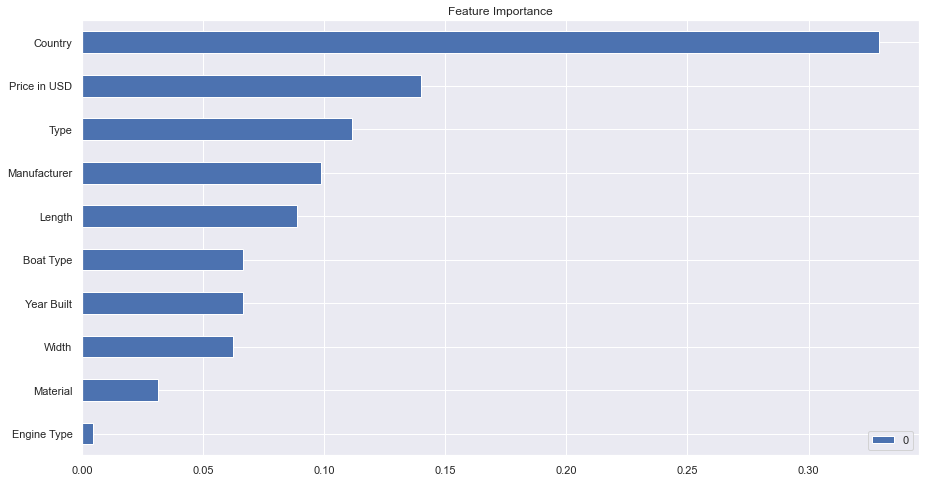

In [72]:
pd.DataFrame(rf_rs.best_estimator_.feature_importances_, index=X.columns).sort_values(by=0).plot(kind='barh', title='Feature Importance');

# MODEL FITTING AND EVALUATION

As this is a regression problem because the predicted output variable is a continuous numerical value.

For my baseline model, I chose LinearRegression because of how simple it is and how easily interpretable it is.It also allows you to understand the strength of relationships between variables.
For my comparison model, I chose RandomForestRegressor because a random forest produces good predictions that can be understood easily. It can handle large datasets efficiently. The random forest algorithm also provides a higher level of accuracy in predicting outcomes.
I have chosen the mean absolute error and the mean squared error to compare the models.
After randomized search the best performing model has a MAE score of 63.7 and mean absolute percentage error of 55%. This means that the model, on average, is 63.7 views away from the actual value.

# SUMMARY

The main goal of this project was to develop a model that can predict views based on features, and discover features that are more predictive of views. Furthermore, some findings could help preventing listings that would lead to lower views.

After randomized search the best performing model has a MAE score of 63.7 and mean absolute percentage error of 55%. This means that the model, on average, is 63.7 views away from the actual value.

However, the model has not reached the desired average 50% error. Overall, the prediction accuracy could be improved by removing the outliers, but then we would lose valuable signals about what leads to higher views. Further considerations should be made regarding which is more important, model accuracy or discovering the different characteristics of lower and higher viewed boats.

Valuable features were discovered, namely, that country and consequently location plays a large part in view count. In adition, the price is important, boat type and year built is somewhat important.

Judging by the large number of missing manufacturer and material rows, and their lower importance, these features should be excluded from the listing survey. The stakeholder should consider making the most important features mandatory to fill out and leave the rest optional.

# LIMITATIONS

Potential improvement could be made by grouping listings to the top markets and develop market specific models. This should solve the outlier problem and would make predictions more accurate. As the location data is very bad quality, improvements should be made so that more granular location data could be extracted, as location is the most important feature.